In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
import time

# 设置字符集,防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
# 加载数据
df=pd.read_csv('datas/household_power_consumption_1000.txt',sep=';',low_memory=False)

print(df.columns.tolist())

df.head()

['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
# 异常数据处理
new_df=df.replace('?',np.nan)
datas=new_df.dropna(axis=0,how='any')
print('数据统计指标表')
datas.describe()

数据统计指标表


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [4]:
print('数据详细指标表')
datas.info()

数据详细指标表
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 78.1+ KB


In [5]:
# 创建一个时间函数格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [8]:
# 获取x和y变量,并将时间转换为数值型连续变量
# X:为时间
# Y:用电量
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas.iloc[:,0:2]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas['Global_active_power']
print(X.head())

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0


In [9]:
# 将数据集划分为训练集和测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
print(type(X_train))
print(X_train.count())

<class 'pandas.core.frame.DataFrame'>
0    800
1    800
2    800
3    800
4    800
5    800
dtype: int64


In [11]:
print(type(X_test))
print(X_test.count())

<class 'pandas.core.frame.DataFrame'>
0    200
1    200
2    200
3    200
4    200
5    200
dtype: int64


In [12]:
# 对数据进行标准化
ss=StandardScaler()
X_train=ss.fit_transform(X_train) # 训练并转换
X_test=ss.transform(X_test) # 直接使用在模型构建数据上进行一个数据标准化操作

# 这里,fit_transform和transform的区别?
# fit_tranform是计算并转换,在这个过程中会计算出均值和方差,然后将变量进行标准化去量纲
# transform是转换,它将用上面计算出的均值和方差来进行标准化去量纲.
# 因为训练集的数据相较于测试集更多 ,所以测试集也延用训练集算出来的均值和方差
# 因此fit_transform在transform上面调用

In [13]:
## 模型训练
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
## 模型校验
y_predict=lr.predict(X_test)
time_name=['年','月','日','时','分','秒']
print("准确率:",lr.score(X_train,Y_train))
mse=np.average((y_predict-Y_test)**2)
rmse=np.sqrt(mse)
print('rmse:',rmse)
print("特征的系数为:",list(zip(time_name,lr.coef_)))

准确率: 0.244093118059
rmse: 1.16409234597
特征的系数为: [('年', 0.0), ('月', 1.1102230246251565e-16), ('日', -1.4158816617332379), ('时', -0.93495324324956441), ('分', -0.10214075598496999), ('秒', 0.0)]


In [15]:
## 模型保存/持久化
from sklearn.externals import joblib

joblib.dump(ss,"data_ss.model") ## 将标准化模型保存
joblib.dump(lr,"data_lr.model") ## 将模型保存

joblib.load("data_ss.model") ## 加载模型
joblib.load("data_lr.model") ## 加载模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

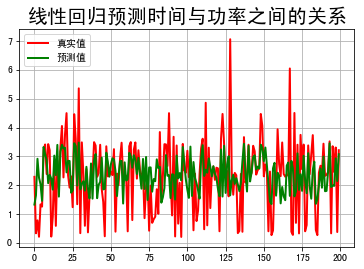

In [17]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label='真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label='预测值')
plt.legend(loc='upper left')
plt.title("线性回归预测时间与功率之间的关系",fontsize=20)
plt.grid(b=True)
plt.show()

# 功率与电流之间的关系

In [18]:
datas.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [30]:
## 功率和电流之间的关系
X = datas.iloc[:,2:4]
Y2 = datas.iloc[:,5]

## 数据集划分
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X,Y2,test_size=0.2,random_state=0)

## 数据归一化,对特征做归一化即可
scaler2=StandardScaler()
X2_train=scaler2.fit_transform(X2_train)
X2_test=scaler2.transform(X2_test)

## 模型训练
lr2=LinearRegression()
lr2.fit(X2_train,Y2_train)

## 结果预测
Y2_predict=lr2.predict(X2_test)

## 模型评估
print("电流训练准确率: ",lr2.score(X2_train,Y2_train))
print("电流预测准确率: ",lr2.score(X2_test,Y2_test))
print("电流参数: ",lr2.coef_)

电流训练准确率:  0.990965757307
电流预测准确率:  0.992042060971
电流参数:  [ 5.07744316  0.07191391]


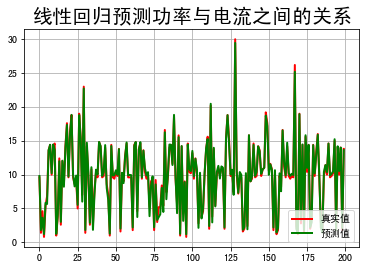

In [34]:
## 绘制图表
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t,Y2_test,'r-',linewidth=2,label="真实值")
plt.plot(t,Y2_predict,'g-',linewidth=2,label="预测值")
plt.legend(loc='lower right')
plt.title("线性回归预测功率与电流之间的关系",fontsize=20)
plt.grid(b=True)
plt.show()